In [25]:
library(MASS)

**This notebook will contain all worked examples in  the lectures as well as the exercises for both Week 7 and Week 8 (Exercises 6 & 7)**

## Drug treatment example (Lecture)

> Enter the data in a list, one treatment / factor level at a time

> Then create a new list which has the factor level labels

> Then stick it all in a dataframe

In [30]:
sc <- c (276, 208, 298, 278, 222, 224,
         376, 426, 430, 248, 287, 290,
         412, 296, 344, 265, 309, 337,
         310, 220, 240, 289, 243, 229)

In [31]:
## CG's way
process <- factor(c(rep(1,6), rep(2,6),
             rep(3,6), rep(4,6)))


In [32]:
## Lecturer's way (cleaner)
process <- factor(rep(1:4, rep(6,4)))

In [33]:
drug.batches <- data.frame(sc, process)
drug.batches

sc,process
276,1
208,1
298,1
278,1
222,1
224,1
376,2
426,2
430,2
248,2


## Plotting a factor x against a continuous variable y produces a box-plot automatically in  R

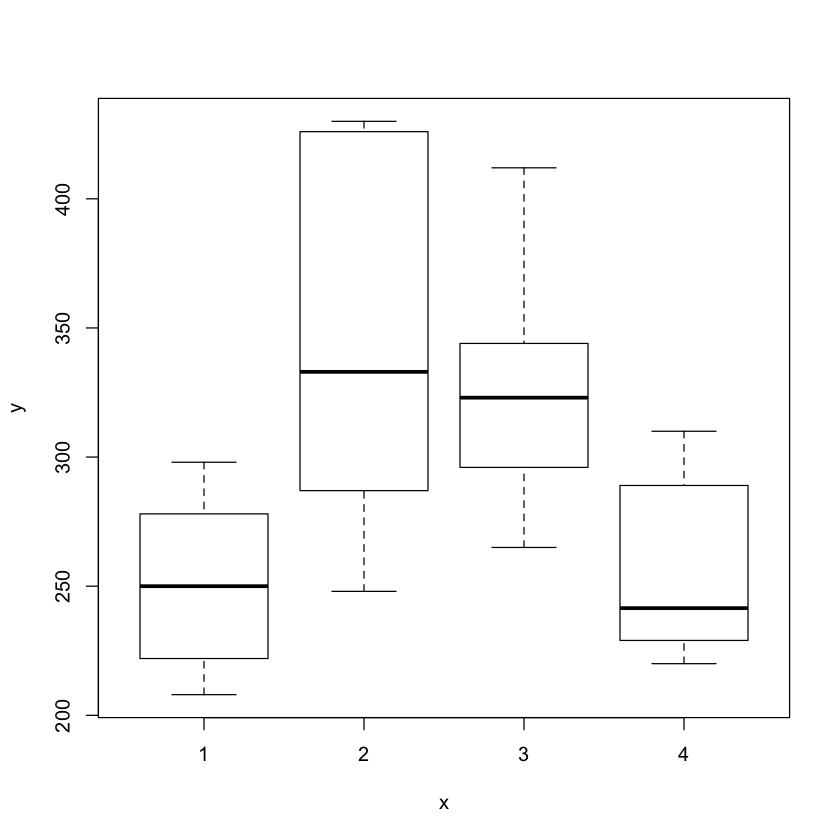

In [34]:
plot(process, sc)

## First thoughts on the box plot:

* Box plots just show percentiles: so show median and IQR and 95%-ile.

* Averages and outliers useful to show the differences between the treatment averages, and indicate that the four processes aren't precisely the same

* For example, process 2 shows the most amount of variation in the amount of key ingredient added to the drug (which is likely not desirable), as well as on average having a greater amount of the key ingredient Vs process (1,3,4).

> **ANOVA - analysis of variance - will allow us to determine whether the deviations between the treatment groups are statistically significant.**

## New command in R: the **by** command

> This command essentially  produces aggregate statistics for groups of factors

> It's like a nice shortcut way of doing SELECT AVG(A), MIN(A), MAX(A) FROM X GROUP BY B

In [35]:
by(sc, process, summary)

process: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  208.0   222.5   250.0   251.0   277.5   298.0 
------------------------------------------------------------ 
process: 2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  248.0   287.8   333.0   342.8   413.5   430.0 
------------------------------------------------------------ 
process: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  265.0   299.2   323.0   327.2   342.2   412.0 
------------------------------------------------------------ 
process: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  220.0   231.8   241.5   255.2   277.5   310.0 

##  Can be more specific with this aggregate statistic calculation function

> Will get the treatment group means

> $y_{ij}$ is the $j$th observation  within the $i$th treatment group

> $i  =  1, 2, ..., a$, $j = 1, 2, ..., n_{i}$

> $y_{i.} = \sum^{n_{i}}_{i=1}y_{ij}$

> $\bar{y}_{i.} = \dfrac{1}{n_{i}} \sum^{n_{i}}_{i=1}y_{ij}$

In [37]:
by(sc, process, mean)

process: 1
[1] 251
------------------------------------------------------------ 
process: 2
[1] 342.8333
------------------------------------------------------------ 
process: 3
[1] 327.1667
------------------------------------------------------------ 
process: 4
[1] 255.1667

## Looking at sums of squares:

> $SS_{T} = SS_{R} + SS_{Treatment}$

> Recall total sum of squares is the corrected sum of y squared, corrected for the total sample average

> Recall  the residual  sum of squares is the correct sum of y squared, corrected for the prediction for y

Our treatment $i$ unbiased sample variance is the  standard formula:

> $s_{i}^{2} = \dfrac{\sum^{n_{i}}_{j=1} \left ( y_{ij} - \hat{y}_{i.} \right )^{2}}{n_{i} - 1}$

Where we can get these unbiased sample estimates of the treatment group variances by the **by** function again...

In [38]:
by(sc, process, var)

process: 1
[1] 1396.4
------------------------------------------------------------ 
process: 2
[1] 6103.367
------------------------------------------------------------ 
process: 3
[1] 2548.567
------------------------------------------------------------ 
process: 4
[1] 1290.167

## Testing null hypothesis

> $H_{0}: \tau_{1} = \tau_{2} = ... = \tau_{a} = 0$

This is the same hypothesis as:

> $H_{0}: \mu_{1} = \mu_{2} = ... = \mu_{a} = 0$

since the treatment mean is equal to the overall mean plus the treatment effect:

> $\mu_{i} = \mu + \tau_{i}$

(And our null hypothesis is that there's no difference in the treatment effects between the treatment groups, and hense that every treatment group has the same mean - the overall mean).

## R process to do this:

1) Create aov object:

```R
drug.batches.aov <- aov(sc ~ process, data = drug.batches)
```

2) Look at the F-value associated with the treatment sum of squares / mean square

> $F_{a-1,N-a} = \dfrac{MS_{Treatment}}{MS_{R}}$

3) R output will tell you the $a-1$ number, and the $N-a$ number

> e.g. below, $a-1 = 3$, so can immediately see that we have $a = 4$ treatment groups.

> Can thus see that we clearly have $N-a=20$, so the total number of observations accross all treatment groups is $N=24$.

In [16]:
drug.batches.aov <- aov(sc ~ process, data = drug.batches)

summary(drug.batches.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
process      3  41050   13683   4.827 0.0109 *
Residuals   20  56693    2835                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [40]:
# lower tail  is false here, as we want to test P(F > 4.827), rather than P(F <= 4.827)
pf(4.827, 3, 20, lower.tail = FALSE)

[1] 0.01095176

* Can clearly see the above p-value is equal to the p-value provided in the ANOVA summary output.

* **We can reject the null hypothesis at the 5% level of significance** (i.e. there is a less than 5% chance of observing the F-statistic we have and the null be true), and therefore we accept the alternative hypothesis, that at least one of the treatment groups has a non-zero treatment effect, $\tau_{i} \neq 0$, for at least one treatment group $i$.

## Confidence intervals for treatment means

> Treatment mean, $\mu_{i} = \mu + \tau_{i}$

> Recall that $y_{ij} \sim NID(\mu_{i}, \sigma^{2}) \sim NID(\mu + \tau_{i}, \sigma^{2})$

> The treatment mean is calculated using two parameters, the overall mean, $\mu$ and the treatment effect, $\tau_{i}$.

> The expectation of $y_{ij}$ clearly equals $\mu_i = \mu + \tau_{i}$

> The parameter estimate for $\mu_{i}$, that is, $\hat{\mu_{i}} = \hat{\mu} + \hat{\tau_{i}}$

> We get $\hat{\mu}$ and $\hat{\tau_{i}}$ by minimising the least squares loss function

## Parameter estimates:

> $\hat{\mu} = \bar{y}_{..}$

> $\hat{\tau}_{i} = \bar{y}_{i.} - \bar{y}_{..}$

Therefore:

> $\hat{\mu}_{i} = \bar{y}_{i.}$

> We know from the distributional assumption that $Var(\bar{y}_{i.}) = \dfrac{\sigma^{2}}{n_{i}}$

Therefore we switch out $\sigma^{2}$ (unknown) for overall, pooled variance $s^{2}$, and therefore the standard error in the treatment mean is:

> $\dfrac{s}{\sqrt{n_{i}}} = \dfrac{\sqrt{MS_{R}}}{\sqrt{n_{i}}}$,

since

> $s^{2} = MS_{R}$.

## Confidence Interval

Our 95% confidence interval for each treatment mean, $\bar{y}_{i.}$ will be:

> $\bar{y}_{i.} \pm t_{N-a, 0.025} \dfrac{s}{\sqrt{n_{i}}}$

In [44]:
summary(drug.batches.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
process      3  41050   13683   4.827 0.0109 *
Residuals   20  56693    2835                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Neat trick!

> can also get a linear model summary of the ANOVA object!

In [76]:
summary.lm(drug.batches.aov)


Call:
aov(formula = sc ~ process, data = drug.batches)

Residuals:
   Min     1Q Median     3Q    Max 
-94.83 -32.17 -13.67  33.33  87.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  251.000     21.736  11.548 2.67e-10 ***
process2      91.833     30.739   2.988  0.00728 ** 
process3      76.167     30.739   2.478  0.02226 *  
process4       4.167     30.739   0.136  0.89353    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.24 on 20 degrees of freedom
Multiple R-squared:   0.42,	Adjusted R-squared:  0.333 
F-statistic: 4.827 on 3 and 20 DF,  p-value: 0.01095


## And can specifically pick out the estimate of the pooled variance, $s^{2}$, which is the $MS_{R}$ from ANOVA:

In [77]:
summary.lm(drug.batches.aov)$sigma^2

[1] 2834.625

In [83]:
# from anova
MS.R <-  2835

# balanced experiment (same treatment group sizes)
n.i <- 6

se.treatment.mean <- sqrt(MS.R / n.i)
print (se.treatment.mean)

N.sub.a <- 20

t.20.0.025 <- qt(0.025, 20, lower.tail=FALSE)
print (t.20.0.025)

treatment.means <- by(sc, process, mean)

conf.L95 <- treatment.means - t.20.0.025*se.treatment.mean
conf.U95 <- treatment.means + t.20.0.025*se.treatment.mean

#treatment.mean.conf <- data.frame(treatment.means, conf.L95, conf.U95)

[1] 21.73707
[1] 2.085963


In [79]:
treatment.means

process: 1
[1] 251
------------------------------------------------------------ 
process: 2
[1] 342.8333
------------------------------------------------------------ 
process: 3
[1] 327.1667
------------------------------------------------------------ 
process: 4
[1] 255.1667

In [80]:
conf.L95

process: 1
[1] 205.6573
------------------------------------------------------------ 
process: 2
[1] 297.4906
------------------------------------------------------------ 
process: 3
[1] 281.8239
------------------------------------------------------------ 
process: 4
[1] 209.8239

In [84]:
conf.U95

process: 1
[1] 296.3427
------------------------------------------------------------ 
process: 2
[1] 388.1761
------------------------------------------------------------ 
process: 3
[1] 372.5094
------------------------------------------------------------ 
process: 4
[1] 300.5094

## Estimates of model parameters

> Recall, model params are $\mu$, $\mu_{i}$, and $\tau_{i}$.

### Treatment mean:

> $\mu_{i} = \mu + \tau_{i}$

> $\hat{\tau}_{i} = \bar{y}_{i.} - \bar{y}_{..}$

> $\hat{\mu} = \bar{y}_{..}$

In [92]:
# estimate for mu, the overall sample mean
mu.bar <- mean(sc)

# the treatment means
tau.i.bar <- by(sc, process, mean) - mu.bar

In [93]:
mu.bar

[1] 294.0417

In [100]:
tau.i.bar

process: 1
[1] -43.04167
------------------------------------------------------------ 
process: 2
[1] 48.79167
------------------------------------------------------------ 
process: 3
[1] 33.125
------------------------------------------------------------ 
process: 4
[1] -38.875

In [101]:
# note the sum to zero constraint
sum(tau.i.bar)

[1] -8.526513e-14

## As all of these are really just means, you can actually just pluck them all out at once:

In [96]:
model.tables(drug.batches.aov, type='means')

Tables of means
Grand mean
         
294.0417 

 process 
process
    1     2     3     4 
251.0 342.8 327.2 255.2 

# **NOTE THAT R USES DIFFERENT CONSTRAINT THAT IN THE NOTES**

>  R uses the corner constraint, $\tau_{1} = 0$

> Notes use sum to zero constraint, $\sum^{a}_{i=1}n_{i}\tau_{i} = 0$

In [102]:
# note the missing process1 (i.e. tau_1)
coef(drug.batches.aov)

(Intercept)    process2    process3    process4 
 251.000000   91.833333   76.166667    4.166667

In [109]:
# here you can see that the first tau, i.e. the treatment effect of the first group is set to zero
dummy.coef(drug.batches.aov)$process - 43.04167

# subtracting the real first tau_1 treatment mean gets you the real result

1         2         3         4 
-43.04167  48.79166  33.12500 -38.87500

## Alternative way of finding the coefficients - going for a linear model

> Note the summary here can be found simply by taking the

```R
summary.lm(ANOVA)
```

In [95]:
drug.batches.lm <- lm(sc ~ process, data=drug.batches)

summary(drug.batches.lm)


Call:
lm(formula = sc ~ process, data = drug.batches)

Residuals:
   Min     1Q Median     3Q    Max 
-94.83 -32.17 -13.67  33.33  87.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  251.000     21.736  11.548 2.67e-10 ***
process2      91.833     30.739   2.988  0.00728 ** 
process3      76.167     30.739   2.478  0.02226 *  
process4       4.167     30.739   0.136  0.89353    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.24 on 20 degrees of freedom
Multiple R-squared:   0.42,	Adjusted R-squared:  0.333 
F-statistic: 4.827 on 3 and 20 DF,  p-value: 0.01095


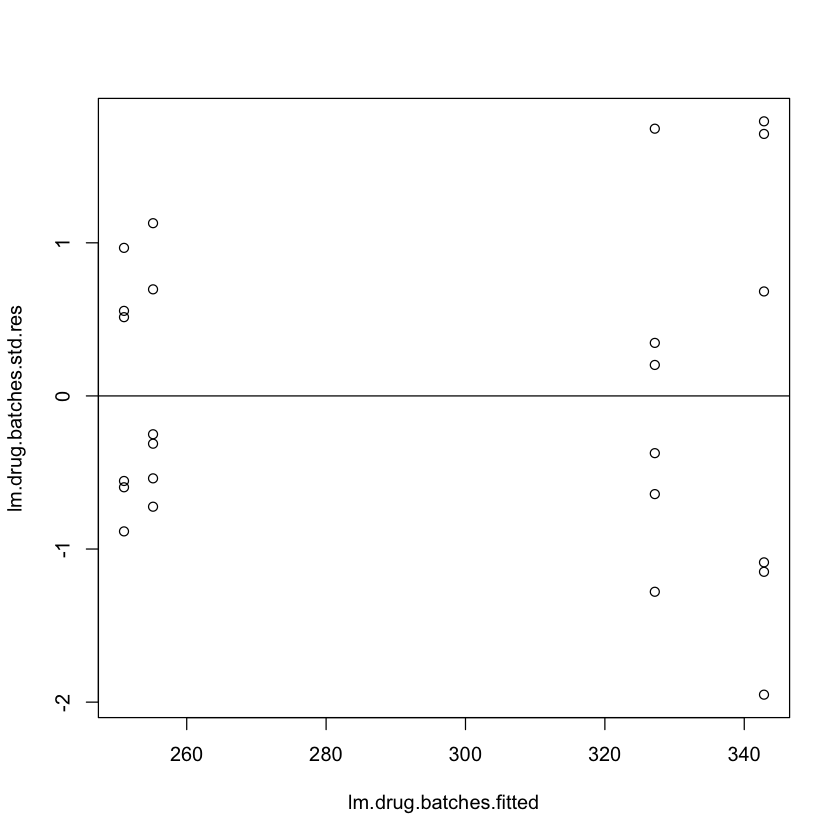

In [28]:
lm.drug.batches.std.res <- stdres(lm.drug.batches)
lm.drug.batches.fitted <- fitted(lm.drug.batches)

plot(lm.drug.batches.fitted, lm.drug.batches.std.res)
abline(0,0)